<a href="https://colab.research.google.com/github/erickxllx/Mid-Term-due-in-stages/blob/main/Mid_Term_due_in_stages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>> Please upload your CSV file (e.g., student_info.csv)


Saving student_info.csv to student_info (3).csv
CSV received: student_info (3).csv
Shape: (1000, 15)
Columns: ['student_id', 'name', 'gender', 'age', 'grade_level', 'math_score', 'reading_score', 'writing_score', 'attendance_rate', 'parent_education', 'study_hours', 'internet_access', 'lunch_type', 'extra_activities', 'final_result']

=== BEFORE: info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        1000 non-null   object 
 1   name              1000 non-null   object 
 2   gender            1000 non-null   object 
 3   age               1000 non-null   int64  
 4   grade_level       1000 non-null   int64  
 5   math_score        1000 non-null   int64  
 6   reading_score     1000 non-null   int64  
 7   writing_score     1000 non-null   int64  
 8   attendance_rate   1000 non-null   float64
 9   parent_educa

,student_id,name,gender,age,grade_level,math_score,reading_score,writing_score,attendance_rate,parent_education,study_hours,internet_access,lunch_type,extra_activities,final_result
0,S1,Student_1,Other,17,10,74,61,90,94.660002,Master's,4.120192,Yes,Free or reduced,Yes,Fail
1,S2,Student_2,Male,17,12,99,70,91,93.173227,Bachelor's,2.886505,No,Free or reduced,No,Pass
2,S3,Student_3,Other,17,9,59,60,99,98.631098,PhD,1.909926,No,Free or reduced,No,Fail
3,S4,Student_4,Other,17,12,70,88,69,96.419620,PhD,1.664740,No,Standard,No,Pass
4,S5,Student_5,Male,15,9,85,77,94,91.332105,PhD,2.330918,Yes,Free or reduced,No,Pass



Numeric columns: ['age', 'grade_level', 'math_score', 'reading_score', 'writing_score', 'attendance_rate', 'study_hours']
Categorical columns: ['student_id', 'name', 'gender', 'parent_education', 'internet_access', 'lunch_type', 'extra_activities', 'final_result']

=== LogisticRegression ===
Accuracy: 0.46
Precision: 0.4806
Recall: 0.6019
F1: 0.5345

Classification Report:
               precision    recall  f1-score   support

        Fail       0.42      0.31      0.36        97
        Pass       0.48      0.60      0.53       103

    accuracy                           0.46       200
   macro avg       0.45      0.46      0.45       200
weighted avg       0.45      0.46      0.45       200



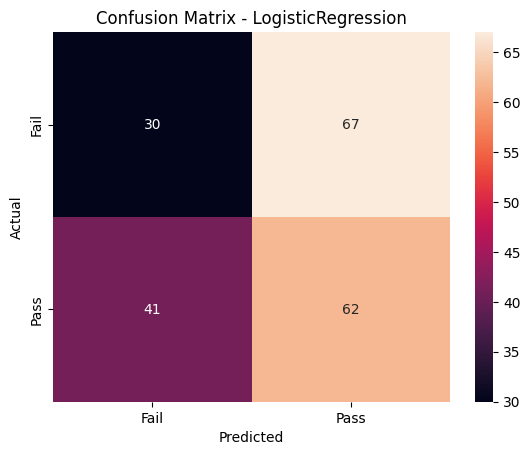


=== RandomForest ===
Accuracy: 0.535
Precision: 0.551
Recall: 0.5243
F1: 0.5373

Classification Report:
               precision    recall  f1-score   support

        Fail       0.52      0.55      0.53        97
        Pass       0.55      0.52      0.54       103

    accuracy                           0.54       200
   macro avg       0.54      0.54      0.53       200
weighted avg       0.54      0.54      0.54       200



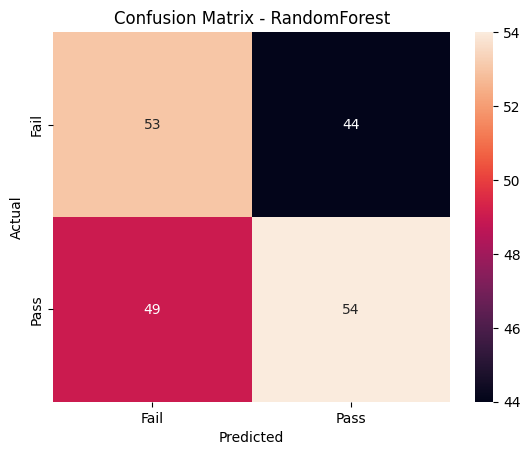


=== AFTER: Processed Data ===
Shape (train transformed): (800, 20)
Example of transformed columns (first 30): ['age', 'grade_level', 'math_score', 'reading_score', 'writing_score', 'attendance_rate', 'study_hours', 'gender_Female', 'gender_Male', 'gender_Other', "parent_education_Bachelor's", 'parent_education_High School', "parent_education_Master's", 'parent_education_PhD', 'internet_access_No', 'internet_access_Yes', 'lunch_type_Free or reduced', 'lunch_type_Standard', 'extra_activities_No', 'extra_activities_Yes']


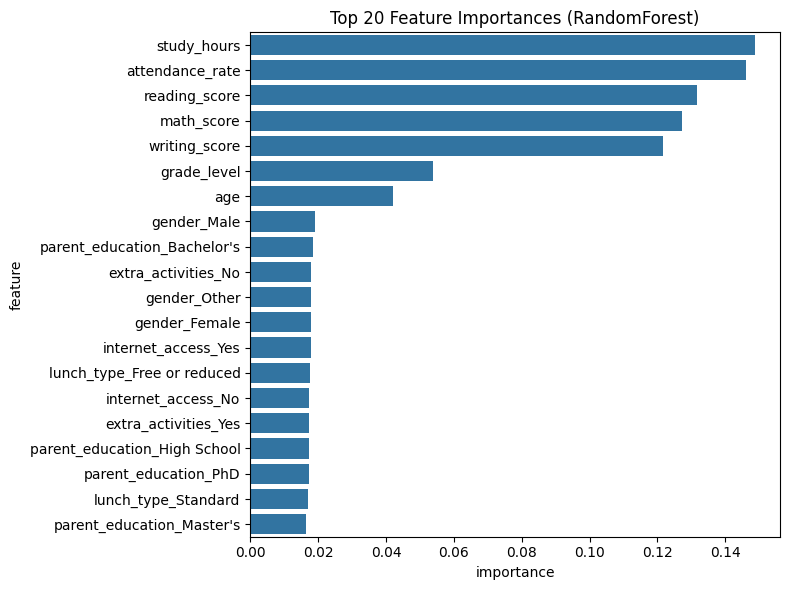

,feature,importance
6,study_hours,0.148698
5,attendance_rate,0.146064
3,reading_score,0.131559
2,math_score,0.127114
4,writing_score,0.121794
1,grade_level,0.053867
0,age,0.042121
8,gender_Male,0.019005
10,parent_education_Bachelor's,0.018572
18,extra_activities_No,0.017893



✅ PDF generated: student_performance_proposal.pdf — you can download it from the left panel in Colab.


In [5]:
# ============================================
# Student Academic Performance – CSV Upload Version
# Author: Ing. Erick Banegas
# Date: October 2025
# ============================================

!pip -q install reportlab scikit-learn pandas matplotlib seaborn

import io, datetime, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

# ------- Configuration -------
DATASET_URL = "https://www.kaggle.com/datasets/therohithanand/student-academic-performance-dataset"
PDF_NAME = "student_performance_proposal.pdf"
PROJECT_TITLE = "Predicting Student Academic Performance"
AUTHOR = "Ing. Erick Banegas"
target_col = "final_result"   # Change if your CSV uses a different column name
drop_cols = ["student_id", "name"]  # Non-predictive columns if present

# ------- 1) Upload CSV -------
print(">> Please upload your CSV file (e.g., student_info.csv)")
uploaded = files.upload()
csv_candidates = [k for k in uploaded.keys() if k.lower().endswith(".csv")]
assert csv_candidates, "No CSV file uploaded!"
csv_path = csv_candidates[0]
print("CSV received:", csv_path)

df = pd.read_csv(csv_path)
print("Shape:", df.shape)
print("Columns:", list(df.columns))

# ------- 2) BEFORE (raw dataset) -------
print("\n=== BEFORE: info() ===")
buf = io.StringIO(); df.info(buf=buf); print(buf.getvalue())
print("\n=== BEFORE: Missing values (count) ==="); print(df.isna().sum())
print("\n=== BEFORE: Head ==="); display(df.head())

# Detect numeric & categorical columns
num_cols_raw = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols_raw = [c for c in df.columns if c not in num_cols_raw]
print("\nNumeric columns:", num_cols_raw)
print("Categorical columns:", cat_cols_raw)

# ------- 3) Data Preparation -------
assert target_col in df.columns, f"Target column '{target_col}' not found!"
X = df.drop(columns=[target_col] + [c for c in drop_cols if c in df.columns], errors="ignore")
y = df[target_col].astype(str)

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

# ------- 4) Train/Test Split + Preprocessing -------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

numeric_transformer = Pipeline([("scaler", StandardScaler())])
categorical_transformer = Pipeline([("onehot", OneHotEncoder(handle_unknown="ignore"))])

preprocess = ColumnTransformer(
    [("num", numeric_transformer, num_cols),
     ("cat", categorical_transformer, cat_cols)],
    remainder="drop"
)

# ------- 5) Models -------
logreg = Pipeline([("prep", preprocess), ("clf", LogisticRegression(max_iter=1000))])
rf = Pipeline([("prep", preprocess), ("clf", RandomForestClassifier(n_estimators=300, random_state=42))])

models = {"LogisticRegression": logreg, "RandomForest": rf}
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label="Pass") if "Pass" in y.unique() else precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, pos_label="Pass") if "Pass" in y.unique() else recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, pos_label="Pass") if "Pass" in y.unique() else f1_score(y_test, y_pred, average="weighted")
    results[name] = {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1}

    print(f"\n=== {name} ===")
    print("Accuracy:", round(acc, 4))
    print("Precision:", round(prec, 4))
    print("Recall:", round(rec, 4))
    print("F1:", round(f1, 4))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred, labels=sorted(y.unique()))
    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted"); plt.ylabel("Actual")
    plt.show()

# ------- 6) AFTER (processed dataset) -------
preprocess.fit(X_train)
Xtr = preprocess.transform(X_train)
print("\n=== AFTER: Processed Data ===")
print("Shape (train transformed):", Xtr.shape)

after_cols = []
after_cols += num_cols
if cat_cols:
    ohe = preprocess.named_transformers_["cat"].named_steps["onehot"]
    after_cols += ohe.get_feature_names_out(cat_cols).tolist()
print("Example of transformed columns (first 30):", after_cols[:30])

# ------- 7) Feature Importance (Random Forest) -------
rf_plain = RandomForestClassifier(n_estimators=300, random_state=42)
rf_plain.fit(preprocess.transform(X), y)
importances = rf_plain.feature_importances_

imp_df = pd.DataFrame({"feature": after_cols, "importance": importances}).sort_values("importance", ascending=False).head(20)
plt.figure(figsize=(8,6))
sns.barplot(data=imp_df, x="importance", y="feature")
plt.title("Top 20 Feature Importances (RandomForest)")
plt.tight_layout()
plt.show()
display(imp_df)

# ------- 8) One-Page PDF Report -------
from reportlab.lib.pagesizes import LETTER
from reportlab.pdfgen import canvas
from reportlab.lib.units import inch

def split_text(text, max_chars=95):
    words, lines, cur = text.split(), [], []
    count = 0
    for w in words:
        extra = 1 if cur else 0
        if count + len(w) + extra <= max_chars:
            cur.append(w); count += len(w) + extra
        else:
            lines.append(" ".join(cur)); cur = [w]; count = len(w)
    if cur: lines.append(" ".join(cur))
    return lines

def generate_pdf(pdf_path, title, author, dataset_url, before_txt, after_txt, results_dict):
    c = canvas.Canvas(pdf_path, pagesize=LETTER)
    w, h = LETTER
    m = 0.8*inch
    y = h - m

    c.setFont("Helvetica-Bold", 16); c.drawString(m, y, title); y -= 20
    c.setFont("Helvetica", 10)
    c.drawString(m, y, f"Author: {author}"); y -= 14
    c.drawString(m, y, f"Date: {datetime.date.today().strftime('%B %d, %Y')}"); y -= 14
    c.drawString(m, y, f"Dataset URL: {dataset_url}"); y -= 18

    c.setFont("Helvetica-Bold", 12); c.drawString(m, y, "Objective"); y -= 12
    c.setFont("Helvetica", 10)
    for line in split_text("Predict Pass/Fail outcomes and identify the main factors influencing student performance using data preprocessing and machine learning models.", 95):
        c.drawString(m, y, line); y -= 12

    y -= 6
    c.setFont("Helvetica-Bold", 12); c.drawString(m, y, "Before → After Processing"); y -= 12
    c.setFont("Helvetica", 10); c.drawString(m, y, "Before:"); y -= 12
    for line in split_text(before_txt, 95):
        c.drawString(m+15, y, line); y -= 12
    c.drawString(m, y, "After:"); y -= 12
    for line in split_text(after_txt, 95):
        c.drawString(m+15, y, line); y -= 12

    y -= 6
    c.setFont("Helvetica-Bold", 12); c.drawString(m, y, "Model Performance"); y -= 14
    c.setFont("Helvetica", 10)
    for model_name, mtrs in results_dict.items():
        line = (f"{model_name} — Acc: {mtrs['accuracy']:.3f} | "
                f"Prec: {mtrs['precision']:.3f} | Rec: {mtrs['recall']:.3f} | F1: {mtrs['f1']:.3f}")
        c.drawString(m, y, line); y -= 12

    c.showPage(); c.save()

before_text = ("Raw dataset contains categorical variables (Yes/No, lunch types), missing values, "
               "and non-predictive identifiers such as name or ID. Numerical columns like attendance_rate, "
               "study_hours, and scores have different scales.")
after_text  = ("Cleaned dataset with irrelevant columns removed, categorical variables encoded, "
               "and numerical features standardized. Ready for machine learning model training.")

generate_pdf(PDF_NAME, PROJECT_TITLE, AUTHOR, DATASET_URL, before_text, after_text, results)
print(f"\n✅ PDF generated: {PDF_NAME} — you can download it from the left panel in Colab.")
